In [81]:
# Basic Deterministic Methods
def count_sarw(L, pos=(0, 0), visited=None):
    if visited is None:
        visited = set()
    
    if L == 0:
        return 1
    
    visited.add(pos)
    
    moves = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Up, Right, Down, Left
    count = 0
    
    for dx, dy in moves:
        new_pos = (pos[0] + dx, pos[1] + dy)
        if new_pos not in visited:
            count += count_sarw(L - 1, new_pos, visited.copy())
    
    return count

L = 2  # Example walk length
print(count_sarw(L))


12


0.189776
[0.042115, 0.028876, 0.019337, 0.013228, 0.008963, 0.005944, 0.003979, 0.002751, 0.00184, 0.001214, 0.000824, 0.000537, 0.000374, 0.000251, 0.000185, 0.000103, 7.1e-05, 5e-05, 3.2e-05, 2e-05, 1.7e-05, 9e-06, 9e-06, 4e-06, 2e-06, 2e-06, 1e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


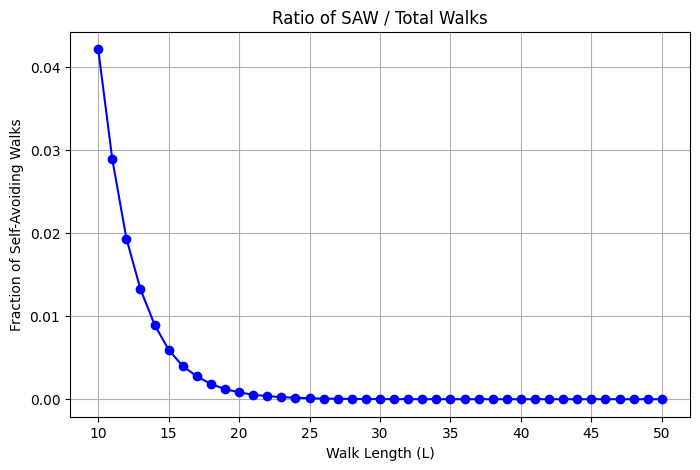

[2.914094772471522, 2.898069608353787, 2.8791154679607986, 2.867870549147387, 2.85631869564332, 2.8422694343914605, 2.831691013279986, 2.827755076763841, 2.819067182961293, 2.8092980448876457, 2.8045058607125113, 2.7947597576242234, 2.79435402803438, 2.7894852297513055, 2.795924759379493, 2.7705977699141027, 2.7700844205536415, 2.771804427089815, 2.7639465063420583, 2.7543970394816153, 2.7737987964008917, 2.7497525955861186, 2.7821469789566717, 2.744644191738394, 2.7192129914952754, 2.7493642226723924, 2.725168276231845, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


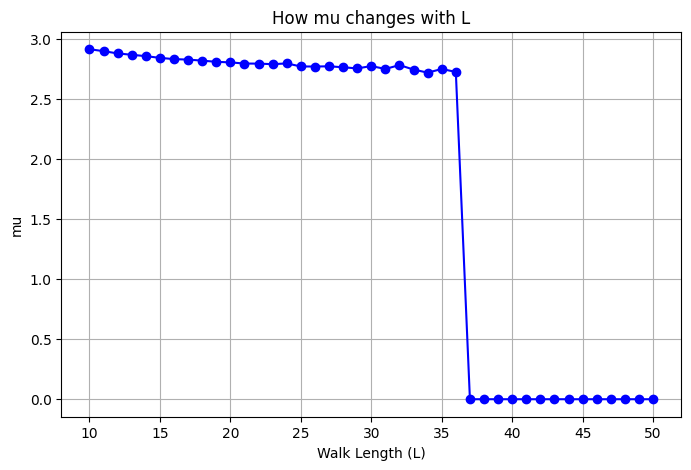

[1.0, 1.0, 0.749444, 0.563137, 0.390854, 0.276932, 0.190534, 0.132723, 0.090337, 0.062152, 0.041809]
[1.0, 4.0, 11.991104, 36.040768, 100.058624, 283.578368, 780.427264, 2174.533632, 5920.325632, 16292.773888, 43839.913984]


In [82]:
# Basic Monte Carlo I
import random
import matplotlib.pyplot as plt

def random_walk(L):
    pos = (0, 0)
    visited = {pos}
    moves = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Up, Right, Down, Left
    
    for _ in range(L):
        dx, dy = random.choice(moves)
        new_pos = (pos[0] + dx, pos[1] + dy)
        if new_pos in visited:
            return False  # Not a self-avoiding walk
        visited.add(new_pos)
        pos = new_pos
    
    return True  # Self-avoiding walk

def estimate_sarw_fraction(L, trials=1000000):
    count_sarw = sum(random_walk(L) for _ in range(trials))
    return count_sarw / trials

L = 6  # Example walk length
trials = 1000000  # Number of trials
print(estimate_sarw_fraction(L, trials))

# Plot SAW / total walk ratio for L = 10 to 50
L_values = range(10, 51)
ratios = [estimate_sarw_fraction(L, trials) for L in L_values]
print(ratios)


plt.figure(figsize=(8, 5))
plt.plot(L_values, ratios, marker='o', linestyle='-', color='b')
plt.xlabel('Walk Length (L)')
plt.ylabel('Fraction of Self-Avoiding Walks')
plt.title('Ratio of SAW / Total Walks')
plt.grid()
plt.show()

#Values of mu as L increases
mu = []
L_values = range(10, 51)
for i, r in enumerate(ratios):
    mu.append(4 * r**(1/L_values[i]))

print(mu)

# Plot value of mu for L = 10 to 50

plt.figure(figsize=(8, 5))
plt.plot(L_values, mu, marker='o', linestyle='-', color='b')
plt.xlabel('Walk Length (L)')
plt.ylabel('mu')
plt.title('How mu changes with L')
plt.grid()
plt.show()

#cL when L = 0 to 10
small_L_values = range(0, 11)
small_ratios = [estimate_sarw_fraction(L, trials) for L in small_L_values]
print(small_ratios)
cL = []
for i, r in enumerate(small_ratios):
    cL.append(4**small_L_values[i] * r)
print(cL)

In [83]:
# Basic Monte Carlo II (untested)
def sophisticated_random_walk(L):
    pos = (0, 0)
    visited = {pos}
    moves = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Up, Right, Down, Left
    
    walk = [pos]
    for _ in range(L - 1):
        valid_moves = [(pos[0] + dx, pos[1] + dy) for dx, dy in moves if (pos[0] + dx, pos[1] + dy) not in visited]
        
        if valid_moves:
            pos = random.choice(valid_moves)
            visited.add(pos)
        
        walk.append(pos)
    
    return walk

def estimate_c_N(L, trials=10000):
    total_walks = 0
    self_avoiding_walks = 0
    
    for _ in range(trials):
        walk = sophisticated_random_walk(L)
        total_walks += 1
        if len(set(walk)) == L:  # Fully self-avoiding
            self_avoiding_walks += 1
    
    return self_avoiding_walks / total_walks

L = 6  # Example walk length
trials = 10000  # Number of trials
print(estimate_c_N(L, trials))

1.0
